In [1]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
import json

In [33]:
import numpy as np

In [138]:
from collections import Counter


Колонка Описание

terminal_id - идентификационный номер терминала

customer_id - идентификационный номер клиента

amount - количество потраченных средств за транзакцию

country - страна

currency - валюта

mcc - код категории продавца

transaction_date - дата транзакции

atm_address - адрес банкомата

pos_address - адрес установки pos-терминала

pos_address_lat - адрес установки pos-терминала широта

pos_address_lon - адрес установки pos-терминала долгота

work_add_lat - широта работы клиента

work_add_lon - долгота работы клиента

home_add_lat - широта дома клиента

home_add_lon - долгота дома клиента


In [2]:
train_df = pd.read_csv('./data/train_set.csv')

C:\Anaconda3\work\raiffazen\env\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (1,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [105]:
mcc_codes = pd.read_csv('./data/mcc_codes.csv', index_col='mcc')

In [3]:
train_df.head()

,amount,atm_address,atm_address_lat,atm_address_lon,city,country,currency,customer_id,home_add_lat,home_add_lon,mcc,pos_address,pos_adress_lat,pos_adress_lon,terminal_id,transaction_date,work_add_lat,work_add_lon
0,2.884034,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,11606fde0c814ce78e0d726e39a0a5ee,2017-07-15,59.847,30.177
1,2.775633,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,e9647a5e1eacfb06713b6af755ccc595,2017-10-27,59.847,30.177
2,3.708368,NaN,NaN,NaN,St Petersburg,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5992,"PR.MARSHALA ZHUKOVA,31St Petersburg190000 7...",59.858198,30.229024,df06c1fcd3718a514535ae822785f716,2017-10-03,59.847,30.177
3,2.787498,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,6c5e5793ebc984fb72875feffff62854,2017-09-09,59.847,30.177
4,2.892510,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,0576445d74e374c92c0902e612fca356,2017-07-06,59.847,30.177


In [4]:
train_df.shape

(1224734, 18)

In [5]:
customer_gr = train_df.groupby('customer_id')

In [6]:
customer_gr.aggregate('count')

,amount,atm_address,atm_address_lat,atm_address_lon,city,country,currency,home_add_lat,home_add_lon,mcc,pos_address,pos_adress_lat,pos_adress_lon,terminal_id,transaction_date,work_add_lat,work_add_lon
customer_id,,,,,,,,,,,,,,,,,
0001f322716470bf9bfc1708f06f00fc,100,68,18,18,100,100,100,100,100,100,32,32,32,100,100,100,100
0007297d86e14bd68bd87b1dbdefe302,247,69,62,62,247,247,247,247,247,247,178,178,178,247,247,0,0
000b709c6c6fb1e8efcfd95e57c2a9de,40,5,4,4,40,40,40,40,40,40,34,35,35,40,40,40,40
0027a7618d97cc9fbda55fac457eaeb7,14,1,0,0,14,14,14,14,14,14,13,13,13,14,14,0,0
002b9f6e118c54f1292e03d1a04d516e,179,27,1,1,179,179,179,179,179,179,150,152,152,179,179,0,0
0031915eb230f772681fb5dc5a8d1c31,185,50,20,20,185,185,185,185,185,185,130,135,135,185,185,185,185
003360bff9882ca4a4f93394dd984822,62,14,14,14,62,62,62,62,62,62,48,48,48,62,62,0,0
0037f3de3d890df1022cc760a1dfd9d6,73,14,14,14,73,73,73,73,73,73,59,59,59,73,73,0,0
003fa58414cc55531fcc38423bea8f8e,210,16,13,13,210,210,210,210,210,210,194,194,194,210,210,210,210


In [7]:
test_cust = '0007297d86e14bd68bd87b1dbdefe302'

In [38]:
test_set = customer_gr.get_group(test_cust)
test_set

,amount,atm_address,atm_address_lat,atm_address_lon,city,country,currency,customer_id,home_add_lat,home_add_lon,mcc,pos_address,pos_adress_lat,pos_adress_lon,terminal_id,transaction_date,work_add_lat,work_add_lon
718977,2.785329,NaN,NaN,NaN,MOSCOW,RUS,643.0,0007297d86e14bd68bd87b1dbdefe302,55.799,37.388,5814,42 SHCHUKINSKAYA STRMOSCOW123007 RUSRUS,55.809300,37.465638,300d8d21415ac5830277c62405eea93c,2017-05-20,NaN,NaN
718978,3.105841,NaN,NaN,NaN,MOSCOW,RUS,643.0,0007297d86e14bd68bd87b1dbdefe302,55.799,37.388,5411,7 TALLINSKAYA STRMOSCOW141000 RUSRUS,55.799838,37.396825,2bf3ad5f5baf4874acfe3224f6fb3b4c,2017-04-09,NaN,NaN
718979,2.359619,NaN,NaN,NaN,MOSCOW,RUS,643.0,0007297d86e14bd68bd87b1dbdefe302,55.799,37.388,5411,3 2-Y NOVOPODMOSKOVNYY BYSTRMOSCOW141000 RU...,55.822604,37.524894,90061b69d305547284fe584d7eb546ca,2017-07-17,NaN,NaN
718980,2.712781,NaN,NaN,NaN,MOSCOW,RUS,643.0,0007297d86e14bd68bd87b1dbdefe302,55.799,37.388,5541,"AKADEMIKA VARGI, VL.13, STR.1MOSCOW117133 R...",55.631563,37.479914,d5bbfd564846e564111c4e2d9b8d63fe,2017-08-11,NaN,NaN
718981,1.483227,NaN,NaN,NaN,MOSCOW,RUS,643.0,0007297d86e14bd68bd87b1dbdefe302,55.799,37.388,5411,2 AKADEMIKA ANOKHINA STR BLDMOSCOW141000 RU...,55.670364,37.477274,69c87fef847d8c96a58743e10081a77e,2017-08-16,NaN,NaN
718982,2.770085,NaN,NaN,NaN,MOSCOW,RUS,643.0,0007297d86e14bd68bd87b1dbdefe302,55.799,37.388,5992,PRESNENSKAYA EMB.MOSCOW123317 RUSRUS,55.746734,37.540920,3401fe9dd94c9965aa8a6453e89554a0,2017-09-29,NaN,NaN
718983,1.979379,NaN,NaN,NaN,MOSKVA,RUS,643.0,0007297d86e14bd68bd87b1dbdefe302,55.799,37.388,5411,"10-S, PRESNENSKAYAMOSKVA123317 RUSRUS",55.746580,37.536301,b67d0baa0a05e72ebbc75e8ebf61cab0,2017-04-06,NaN,NaN
718984,2.994524,NaN,NaN,NaN,MOSCOW,RUS,643.0,0007297d86e14bd68bd87b1dbdefe302,55.799,37.388,4111,"PRESNENSKAYA NAB., 2MOSCOW123456 RUSRUS",55.749044,37.539355,8f594d11fea9befc440f591962d3e964,2017-09-11,NaN,NaN
718985,2.760673,NaN,NaN,NaN,MOSCOW,RUS,643.0,0007297d86e14bd68bd87b1dbdefe302,55.799,37.388,5912,10 TALLINSKAYA STRMOSCOW123458 RUSRUS,55.798714,37.396852,377f9707b225595b6d55419f89e775eb,2017-09-20,NaN,NaN
718986,2.619281,NaN,NaN,NaN,MOSKVA,RUS,643.0,0007297d86e14bd68bd87b1dbdefe302,55.799,37.388,5411,"10-S, PRESNENSKAYAMOSKVA123317 RUSRUS",55.746580,37.536301,03c6d487de2cbe795a52bcb3672d9ea4,2017-10-18,NaN,NaN


In [74]:
pos_position = test_set.loc[:,['pos_adress_lat', 'pos_adress_lon']].dropna().as_matrix()

home_pos = test_set.loc[:,['home_add_lat','home_add_lon']].dropna().as_matrix()
home_pos = np.unique(home_pos, axis=0)[0]

#fig = folium.element.Figure()
map_ = folium.Map(location=[56, 40], zoom_start=6)
сluster = MarkerCluster(pos_position).add_to(map_)
сluster2 = MarkerCluster([home_pos], popups= ['Home']).add_to(map_)

map_

In [76]:
atm_position = test_set.loc[:,['atm_address_lat', 'atm_address_lon']].dropna().as_matrix()

home_pos = test_set.loc[:,['home_add_lat','home_add_lon']].dropna().as_matrix()
home_pos = np.unique(home_pos, axis=0)[0]

#fig = folium.element.Figure()
map_ = folium.Map(location=[56, 40], zoom_start=5)
сluster = MarkerCluster(atm_position).add_to(map_)
сluster2 = MarkerCluster([home_pos], popups= ['Home']).add_to(map_)

map_

In [96]:
c = test_set.set_index(pd.to_datetime(test_set.transaction_date))

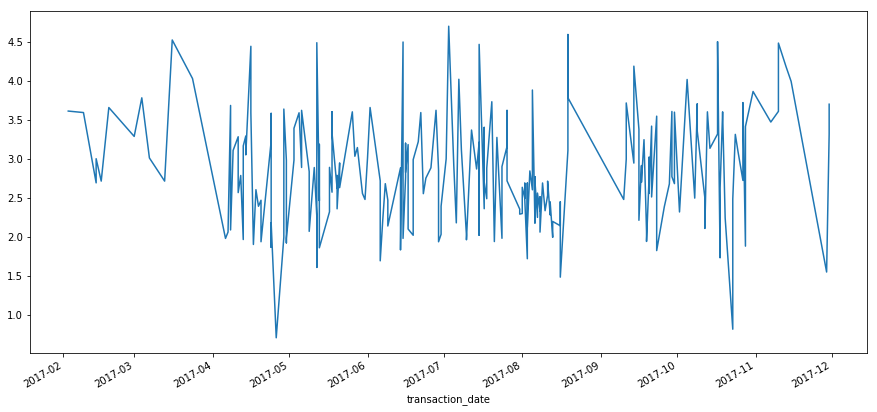

In [97]:
plt.figure(figsize = [15,7])
c.amount.plot()

In [99]:
test_set.mcc.unique()

array([5814, 5411, 5541, 5992, 4111, 5912, 8999, 5999, 5812, 5943, 7230,
       4812, 5942, 5813, 4112, 8099, 5699, 5499, 7832, 5719, 5947, 5451,
       5691, 8299, 6011], dtype=int64)

In [113]:
for code in train_df.mcc.unique():
    try:
        print(code, mcc_codes.loc[code,'edited_description'], '\n')
    except Exception as e:
        print(code, '-Error')

5261 Nurseries – Lawn and Garden Supply Store 

5992 Florists 

5411 Grocery Stores, Supermarkets 

5814 Fast Food Restaurants 

5812 Eating places and Restaurants 

5813 Drinking Places (Alcoholic Beverages), Bars, Taverns, Cocktail lounges, Nightclubs and Discotheques 

5499 Misc. Food Stores – Convenience Stores and Specialty Markets 

5912 Drug Stores and Pharmacies 

4111 Local/Suburban Commuter Passenger Transportation – Railroads, Feries, Local Water Transportation. 

5691 Men’s and Women’s Clothing Stores 

7832 Motion Picture Theaters 

5641 Children’s and Infant’s Wear Stores 

8099 Medical Services and Health Practitioners (Not Elsewhere Classified) 

5541 Service Stations ( with or without ancillary services) 

5722 Household Appliance Stores 

5533 Automotive Parts, Accessories Stores 

5521 Automobile and Truck Dealers (Used Only) 

5300 Wholesale Clubs 

5532 Automotive Tire Stores 

8071 Medical and Dental Laboratories 

5944 Watch, Clock, Jewelry, and Silverware Stores

In [139]:
cnt = Counter()
for k, tr in test_set.iterrows():
    cnt[tr.mcc] +=1

for k, v in cnt.most_common():
    try:
        name = mcc_codes.loc[k,'edited_description']
    except Exception as err:
        name = ' ****  '
 
    print(k, name, v)

6011 Financial Institutions – Manual Cash Disbursements 69
5411 Grocery Stores, Supermarkets 65
5814 Fast Food Restaurants 56
5912 Drug Stores and Pharmacies 11
5812 Eating places and Restaurants 8
5999 Miscellaneous and Specialty Retail Stores 7
5992 Florists 5
4812 Telecommunications Equipment including telephone sales 3
4111 Local/Suburban Commuter Passenger Transportation – Railroads, Feries, Local Water Transportation. 2
8999 Professional Services ( Not Elsewhere Defined) 2
7230 Barber and Beauty Shops 2
5942 Book Stores 2
5499 Misc. Food Stores – Convenience Stores and Specialty Markets 2
7832 Motion Picture Theaters 2
5541 Service Stations ( with or without ancillary services) 1
5943 Stationery Stores, Office and School Supply Stores 1
5813 Drinking Places (Alcoholic Beverages), Bars, Taverns, Cocktail lounges, Nightclubs and Discotheques 1
4112 Passenger Railways 1
8099 Medical Services and Health Practitioners (Not Elsewhere Classified) 1
5699 Miscellaneous Apparel and Accesso

In [149]:
mcc_code = 5411
position = test_set.query('mcc == @mcc_code').loc[:,['pos_adress_lat', 'pos_adress_lon']].dropna().as_matrix()

home_pos = test_set.loc[:,['home_add_lat','home_add_lon']].dropna().as_matrix()
home_pos = np.unique(home_pos, axis=0)[0]

#fig = folium.element.Figure()
map_ = folium.Map(location=[56, 40], zoom_start=5)
сluster = MarkerCluster(position).add_to(map_)
сluster2 = MarkerCluster([home_pos], popups= ['Home']).add_to(map_)

map_

In [150]:
mcc_code = 5814
position = test_set.query('mcc == @mcc_code').loc[:,['pos_adress_lat', 'pos_adress_lon']].dropna().as_matrix()

home_pos = test_set.loc[:,['home_add_lat','home_add_lon']].dropna().as_matrix()
home_pos = np.unique(home_pos, axis=0)[0]

#fig = folium.element.Figure()
map_ = folium.Map(location=[56, 40], zoom_start=5)
сluster = MarkerCluster(position).add_to(map_)
сluster2 = MarkerCluster([home_pos], popups= ['Home']).add_to(map_)

map_

In [151]:
mcc_code = 5912
position = test_set.query('mcc == @mcc_code').loc[:,['pos_adress_lat', 'pos_adress_lon']].dropna().as_matrix()

home_pos = test_set.loc[:,['home_add_lat','home_add_lon']].dropna().as_matrix()
home_pos = np.unique(home_pos, axis=0)[0]

#fig = folium.element.Figure()
map_ = folium.Map(location=[56, 40], zoom_start=5)
сluster = MarkerCluster(position).add_to(map_)
сluster2 = MarkerCluster([home_pos], popups= ['Home']).add_to(map_)

map_

In [152]:
mcc_code = 7230
position = test_set.query('mcc == @mcc_code').loc[:,['pos_adress_lat', 'pos_adress_lon']].dropna().as_matrix()

home_pos = test_set.loc[:,['home_add_lat','home_add_lon']].dropna().as_matrix()
home_pos = np.unique(home_pos, axis=0)[0]

#fig = folium.element.Figure()
map_ = folium.Map(location=[56, 40], zoom_start=5)
сluster = MarkerCluster(position).add_to(map_)
сluster2 = MarkerCluster([home_pos], popups= ['Home']).add_to(map_)

map_

In [ ]:
picture